In [1]:
from torch.utils.data import DataLoader
from fastai.vision.all import *

In [2]:
# Get the full dataset
path = untar_data(URLs.CAMVID_TINY)

In [3]:
# Given a dataset, create the dataloaders object
data_loaders = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames=get_image_files(path/"images"), 
    label_func=lambda x: path/'labels'/f'{x.stem}_P{x.suffix}', 
    codes=np.loadtxt(path/'codes.txt', dtype=str))

In [4]:
# Given data loaders and a model architecture, train
model = unet_learner(data_loaders, resnet34)
model.fine_tune(15)

epoch,train_loss,valid_loss,time
0,3.863167,2.249771,00:03


epoch,train_loss,valid_loss,time
0,1.930627,1.772097,00:01
1,1.710316,1.464009,00:01
2,1.584439,1.390605,00:01
3,1.477358,1.261523,00:01
4,1.350260,0.966259,00:01
5,1.220977,0.897962,00:01
6,1.114340,0.897518,00:01
7,1.020033,0.807330,00:01
8,0.937943,0.801618,00:01
9,0.867803,0.744811,00:01


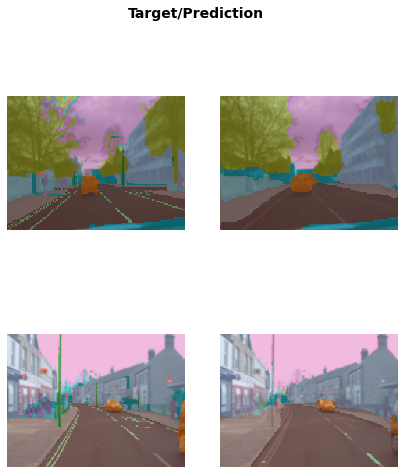

In [5]:
model.show_results(max_n=6, figsize=(7,8))

In [7]:
data_loaders[0]